### Import dependencies

In [1]:
%load_ext autotime

from IPython.display import display_html
from PIL import Image as PILImage

from img2table.document import Image
from img2table.ocr import TesseractOCR

time: 4.64 s (started: 2023-09-19 22:03:28 +02:00)


The <code>implicit_rows</code> parameter is used to split existing rows into smaller ones if:
1. The row contains multi-line cells
2. Vertical separation between elements of the cell is large enough

### Image used for the example

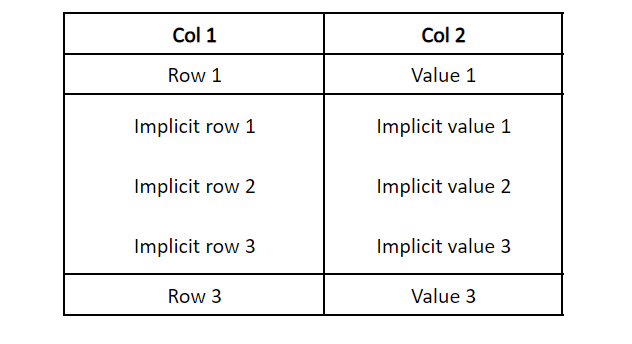

time: 16 ms (started: 2023-09-19 22:03:33 +02:00)


In [2]:
PILImage.open("data/implicit.png")

### Instantiate objects

In [3]:
# Define OCR instance, requires prior installation of Tesseract-OCR
ocr = TesseractOCR()

# Define image
img = Image(src="data/implicit.png")

time: 110 ms (started: 2023-09-19 22:03:34 +02:00)


### Extract tables

In [4]:
# Extract tables without implicit rows
extracted_tables = img.extract_tables(ocr=ocr, implicit_rows=False)
table = extracted_tables.pop()

# Extract tables with implicit rows
extracted_tables_implicit = img.extract_tables(ocr=ocr, implicit_rows=True)
table_implicit_rows = extracted_tables_implicit.pop()

time: 640 ms (started: 2023-09-19 22:03:36 +02:00)


In [5]:
display_html(table.html_repr(title="Regular table"), raw=True)
display_html(table_implicit_rows.html_repr(title="Table with implicit rows"), raw=True)

Regular table 
 
 Title: No title detected 
 Bounding box: x1=64, y1=12, x2=562, y2=314
 
 
 
 
 
 0 
 1 
 
 
 
 
 0 
 Col1 
 Col 2 
 
 
 1 
 Row 1 
 Value 1 
 
 
 2 
 Implicit row 1\nImplicit row 2\nImplicit row 3 
 Implicit value 1\nImplicit value 2\nImplicit value 3 
 
 
 3 
 Row 3 
 Value 3

Table with implicit rows 
 
 Title: No title detected 
 Bounding box: x1=64, y1=12, x2=562, y2=314
 
 
 
 
 
 0 
 1 
 
 
 
 
 0 
 Col1 
 Col 2 
 
 
 1 
 Row 1 
 Value 1 
 
 
 2 
 Implicit row 1 
 Implicit value 1 
 
 
 3 
 Implicit row 2 
 Implicit value 2 
 
 
 4 
 Implicit row 3 
 Implicit value 3 
 
 
 5 
 Row 3 
 Value 3

time: 0 ns (started: 2023-09-19 22:03:38 +02:00)
